# Imports

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

# Web scraping 

In [2]:
urls = ['https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=G' 
        ,'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=PG-13',
        'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=G%2FPG',
        'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=NC-17',
        'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=R',
        'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=PG',
       'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=G&offset=200',
       'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=PG&offset=200',
       'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=PG-13&offset=200',
       'https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?area=XWW&by_mpaa=R&offset=200']
headers=['Title',
 'Rank',
 'Lifetime Gross',
 'Overall Rank',
 'Year']
movies = {}
counter=0

In [3]:
for url in urls:
    
    response = requests.get(url)
    
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    
    table = soup.find('table',class_='a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated')
    
            
            
    rows= [row for row in table.find_all('tr')]
    for row in rows[1:200]:
        items = row.find_all('td')
        link = items[0].find('a')
        title = link.text
        movies[title] = [i.text for i in items]
        counter=counter+1
    


In [4]:
headers


['Title', 'Rank', 'Lifetime Gross', 'Overall Rank', 'Year']

In [5]:
Scraped_data = pd.DataFrame(movies).T
Scraped_data.columns=(headers)
Scraped_data.reset_index(inplace=True)
Scraped_data.drop(columns='index',inplace=True)



In [6]:
Scraped_data


,Title,Rank,Lifetime Gross,Overall Rank,Year
0,Toy Story 4,7,"$1,073,394,593",33,2019
1,Toy Story 3,8,"$1,066,970,811",34,2010
2,The Lion King,1,"$1,667,635,327",7,2019
3,Finding Nemo,19,"$940,352,645",58,2003
4,Monsters University,36,"$743,559,645",112,2013
...,...,...,...,...,...
1612,Office Christmas Party,395,"$114,501,299","1,497",2016
1613,The Score,396,"$114,252,154","1,499",2001
1614,Saw V,397,"$113,864,059","1,505",2008
1615,Insomnia,398,"$113,758,770","1,506",2002


In [7]:

Scraped_data[Scraped_data.duplicated(keep='last')]

,Title,Rank,Lifetime Gross,Overall Rank,Year


In [8]:
Scraped_data[Scraped_data['Title'] == 'Frozen II']

,Title,Rank,Lifetime Gross,Overall Rank,Year
394,Frozen II,2,"$1,450,026,933",10,2019


In [9]:
# remove duplicated values 
# Scraped_data=Scraped_data.drop_duplicates( keep='first', inplace=True)

In [10]:
## check if there is any null values
Scraped_data.isnull().sum()

Title             0
Rank              0
Lifetime Gross    0
Overall Rank      0
Year              0
dtype: int64

In [11]:
Scraped_data["Title"] = Scraped_data.Title.str.strip().str.lower()
# Scraped_data["Year"] = Scraped_data.Year.str.strip()
Scraped_data["Year"] = pd.to_datetime(Scraped_data["Year"])

In [12]:
Scraped_data.dtypes

Title                     object
Rank                      object
Lifetime Gross            object
Overall Rank              object
Year              datetime64[ns]
dtype: object

# EDA

In [13]:
DataSet=pd.read_csv('IMDb movies.csv')
DataSet

C:\Users\noody\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,Title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,"$2,250",NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,"$45,000",NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,1/29/2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,"$3,507,171",NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2/13/2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,"$7,299,062",NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,3/8/2019,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,3/15/2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,"$2,833",NaN,NaN,NaN


In [14]:
DataSet.columns

Index(['imdb_title_id', 'Title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [15]:
# remove unwanted columns
droplist=['imdb_title_id','Title','budget','usa_gross_income',
          'worlwide_gross_income','metascore','reviews_from_critics','reviews_from_users']
NewDataSet=DataSet
NewDataSet.drop(columns=droplist,inplace=True)

In [16]:
NewDataSet


,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154
1,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589
2,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188
3,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
4,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Le lion,2020,1/29/2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398
85851,De Beentjes van Sint-Hildegard,2020,2/13/2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724
85852,Padmavyuhathile Abhimanyu,2019,3/8/2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265
85853,Sokagin Çocuklari,2019,3/15/2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194


In [17]:
NewDataSet[NewDataSet.duplicated(keep='last')]

,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes


In [18]:
test= pd.Index(NewDataSet[['original_title','year']])
test2=pd.Index(Scraped_data[['Title','Year']])
result=test.intersection(test2)
pd.DataFrame(result)

,0


In [19]:
NewDataSet.isnull().sum()

original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                 64
language               833
director                87
writer                1572
production_company    4455
actors                  69
description           2115
avg_vote                 0
votes                    0
dtype: int64

In [20]:
NewDataSet[NewDataSet["original_title"] == 'toy story 4']

,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes


In [21]:
NewDataSet["original_title"] = NewDataSet.original_title.str.strip().str.lower()

NewDataSet[NewDataSet["year"] == 'TV Movie 2019']='2019'
NewDataSet["year"] = pd.to_datetime(NewDataSet["year"],format='%Y')
# NewDataSet.isnull().sum()

In [22]:
test= NewDataSet[['original_title','year']]
test

,original_title,year
0,miss jerry,1894-01-01
1,the story of the kelly gang,1906-01-01
2,den sorte drøm,1911-01-01
3,cleopatra,1912-01-01
4,l'inferno,1911-01-01
...,...,...
85850,le lion,2020-01-01
85851,de beentjes van sint-hildegard,2020-01-01
85852,padmavyuhathile abhimanyu,2019-01-01
85853,sokagin çocuklari,2019-01-01


In [23]:
MergedData = pd.merge( Scraped_data,NewDataSet, left_on=['Title','Year'], right_on = ['original_title','year'])


In [24]:
MergedData

,Title,Rank,Lifetime Gross,Overall Rank,Year,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,toy story 4,7,"$1,073,394,593",33,2019-01-01,toy story 4,2019-01-01,6/26/2019,"Animation, Adventure, Comedy",100,USA,English,Josh Cooley,"John Lasseter, Andrew Stanton",Pixar Animation Studios,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...","When a new toy called ""Forky"" joins Woody and ...",7.8,189129
1,toy story 3,8,"$1,066,970,811",34,2010-01-01,toy story 3,2010-01-01,7/7/2010,"Animation, Adventure, Comedy",103,USA,"English, Spanish",Lee Unkrich,"John Lasseter, Andrew Stanton",Walt Disney Pictures,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",The toys are mistakenly delivered to a day-car...,8.3,739717
2,the lion king,1,"$1,667,635,327",7,2019-01-01,the lion king,2019-01-01,8/21/2019,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,"Jeff Nathanson, Irene Mecchi",Walt Disney Pictures,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","After the murder of his father, a young lion p...",6.9,199521
3,finding nemo,19,"$940,352,645",58,2003-01-01,finding nemo,2003-01-01,12/3/2003,"Animation, Adventure, Comedy",100,"USA, Australia",English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",Pixar Animation Studios,"Albert Brooks, Ellen DeGeneres, Alexander Goul...",After his son is captured in the Great Barrier...,8.1,927957
4,monsters university,36,"$743,559,645",112,2013-01-01,monsters university,2013-01-01,8/21/2013,"Animation, Adventure, Comedy",104,USA,English,Dan Scanlon,"Dan Scanlon, Daniel Gerson",Walt Disney Pictures,"Billy Crystal, John Goodman, Steve Buscemi, He...",A look at the relationship between Mike Wazows...,7.3,313986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,office christmas party,395,"$114,501,299","1,497",2016-01-01,office christmas party,2016-01-01,12/7/2016,Comedy,105,USA,"English, Russian","Josh Gordon, Will Speck","Jon Lucas, Scott Moore",DreamWorks,"Jason Bateman, Olivia Munn, T.J. Miller, Jenni...",When his uptight CEO sister threatens to shut ...,5.8,66300
1312,the score,396,"$114,252,154","1,499",2001-01-01,the score,2001-01-01,10/19/2001,"Action, Crime, Drama",124,"Germany, Canada, USA","English, French",Frank Oz,"Daniel E. Taylor, Kario Salem",Paramount Pictures,"Robert De Niro, Edward Norton, Marlon Brando, ...",An aging thief hopes to retire and live off hi...,6.8,119173
1313,saw v,397,"$113,864,059","1,505",2008-01-01,saw v,2008-01-01,12/5/2008,"Horror, Mystery",92,"Canada, USA",English,David Hackl,"Patrick Melton, Marcus Dunstan",Twisted Pictures,"Tobin Bell, Costas Mandylor, Scott Patterson, ...","Following Jigsaw's grisly demise, Mark Hoffman...",5.8,113053
1314,insomnia,398,"$113,758,770","1,506",2002-01-01,insomnia,2002-01-01,11/8/2002,"Drama, Mystery, Thriller",118,"USA, UK",English,Christopher Nolan,"Hillary Seitz, Nikolaj Frobenius",Alcon Entertainment,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304


In [25]:
MergedData[MergedData["Title"] == 'a christmas carol']

,Title,Rank,Lifetime Gross,Overall Rank,Year,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
433,a christmas carol,121,"$325,286,646",450,2009-01-01,a christmas carol,2009-01-01,12/3/2009,"Animation, Drama, Family",96,USA,English,Robert Zemeckis,"Charles Dickens, Robert Zemeckis",Walt Disney Pictures,"Jim Carrey, Steve Valentine, Daryl Sabara, Sag...",An animated retelling of Charles Dickens' clas...,6.8,98606


In [26]:
MergedData[MergedData.duplicated(subset=["original_title"], keep=False)].sort_values(by= "original_title")

,Title,Rank,Lifetime Gross,Overall Rank,Year,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes


In [27]:
MergedData[["month", "day", "year"]] = MergedData["date_published"].str.split("/", expand = True)

In [28]:
MergedData

,Title,Rank,Lifetime Gross,Overall Rank,Year,original_title,year,date_published,genre,duration,...,language,director,writer,production_company,actors,description,avg_vote,votes,month,day
0,toy story 4,7,"$1,073,394,593",33,2019-01-01,toy story 4,2019,6/26/2019,"Animation, Adventure, Comedy",100,...,English,Josh Cooley,"John Lasseter, Andrew Stanton",Pixar Animation Studios,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...","When a new toy called ""Forky"" joins Woody and ...",7.8,189129,6,26
1,toy story 3,8,"$1,066,970,811",34,2010-01-01,toy story 3,2010,7/7/2010,"Animation, Adventure, Comedy",103,...,"English, Spanish",Lee Unkrich,"John Lasseter, Andrew Stanton",Walt Disney Pictures,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",The toys are mistakenly delivered to a day-car...,8.3,739717,7,7
2,the lion king,1,"$1,667,635,327",7,2019-01-01,the lion king,2019,8/21/2019,"Animation, Adventure, Drama",118,...,"English, Xhosa, Zulu, French, Spanish",Jon Favreau,"Jeff Nathanson, Irene Mecchi",Walt Disney Pictures,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","After the murder of his father, a young lion p...",6.9,199521,8,21
3,finding nemo,19,"$940,352,645",58,2003-01-01,finding nemo,2003,12/3/2003,"Animation, Adventure, Comedy",100,...,English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",Pixar Animation Studios,"Albert Brooks, Ellen DeGeneres, Alexander Goul...",After his son is captured in the Great Barrier...,8.1,927957,12,3
4,monsters university,36,"$743,559,645",112,2013-01-01,monsters university,2013,8/21/2013,"Animation, Adventure, Comedy",104,...,English,Dan Scanlon,"Dan Scanlon, Daniel Gerson",Walt Disney Pictures,"Billy Crystal, John Goodman, Steve Buscemi, He...",A look at the relationship between Mike Wazows...,7.3,313986,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,office christmas party,395,"$114,501,299","1,497",2016-01-01,office christmas party,2016,12/7/2016,Comedy,105,...,"English, Russian","Josh Gordon, Will Speck","Jon Lucas, Scott Moore",DreamWorks,"Jason Bateman, Olivia Munn, T.J. Miller, Jenni...",When his uptight CEO sister threatens to shut ...,5.8,66300,12,7
1312,the score,396,"$114,252,154","1,499",2001-01-01,the score,2001,10/19/2001,"Action, Crime, Drama",124,...,"English, French",Frank Oz,"Daniel E. Taylor, Kario Salem",Paramount Pictures,"Robert De Niro, Edward Norton, Marlon Brando, ...",An aging thief hopes to retire and live off hi...,6.8,119173,10,19
1313,saw v,397,"$113,864,059","1,505",2008-01-01,saw v,2008,12/5/2008,"Horror, Mystery",92,...,English,David Hackl,"Patrick Melton, Marcus Dunstan",Twisted Pictures,"Tobin Bell, Costas Mandylor, Scott Patterson, ...","Following Jigsaw's grisly demise, Mark Hoffman...",5.8,113053,12,5
1314,insomnia,398,"$113,758,770","1,506",2002-01-01,insomnia,2002,11/8/2002,"Drama, Mystery, Thriller",118,...,English,Christopher Nolan,"Hillary Seitz, Nikolaj Frobenius",Alcon Entertainment,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304,11,8


# Clean the data

In [29]:
MergedData.drop(columns='Year',inplace=True)

In [30]:
MergedData

,Title,Rank,Lifetime Gross,Overall Rank,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,month,day
0,toy story 4,7,"$1,073,394,593",33,toy story 4,2019,6/26/2019,"Animation, Adventure, Comedy",100,USA,English,Josh Cooley,"John Lasseter, Andrew Stanton",Pixar Animation Studios,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...","When a new toy called ""Forky"" joins Woody and ...",7.8,189129,6,26
1,toy story 3,8,"$1,066,970,811",34,toy story 3,2010,7/7/2010,"Animation, Adventure, Comedy",103,USA,"English, Spanish",Lee Unkrich,"John Lasseter, Andrew Stanton",Walt Disney Pictures,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",The toys are mistakenly delivered to a day-car...,8.3,739717,7,7
2,the lion king,1,"$1,667,635,327",7,the lion king,2019,8/21/2019,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,"Jeff Nathanson, Irene Mecchi",Walt Disney Pictures,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","After the murder of his father, a young lion p...",6.9,199521,8,21
3,finding nemo,19,"$940,352,645",58,finding nemo,2003,12/3/2003,"Animation, Adventure, Comedy",100,"USA, Australia",English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",Pixar Animation Studios,"Albert Brooks, Ellen DeGeneres, Alexander Goul...",After his son is captured in the Great Barrier...,8.1,927957,12,3
4,monsters university,36,"$743,559,645",112,monsters university,2013,8/21/2013,"Animation, Adventure, Comedy",104,USA,English,Dan Scanlon,"Dan Scanlon, Daniel Gerson",Walt Disney Pictures,"Billy Crystal, John Goodman, Steve Buscemi, He...",A look at the relationship between Mike Wazows...,7.3,313986,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,office christmas party,395,"$114,501,299","1,497",office christmas party,2016,12/7/2016,Comedy,105,USA,"English, Russian","Josh Gordon, Will Speck","Jon Lucas, Scott Moore",DreamWorks,"Jason Bateman, Olivia Munn, T.J. Miller, Jenni...",When his uptight CEO sister threatens to shut ...,5.8,66300,12,7
1312,the score,396,"$114,252,154","1,499",the score,2001,10/19/2001,"Action, Crime, Drama",124,"Germany, Canada, USA","English, French",Frank Oz,"Daniel E. Taylor, Kario Salem",Paramount Pictures,"Robert De Niro, Edward Norton, Marlon Brando, ...",An aging thief hopes to retire and live off hi...,6.8,119173,10,19
1313,saw v,397,"$113,864,059","1,505",saw v,2008,12/5/2008,"Horror, Mystery",92,"Canada, USA",English,David Hackl,"Patrick Melton, Marcus Dunstan",Twisted Pictures,"Tobin Bell, Costas Mandylor, Scott Patterson, ...","Following Jigsaw's grisly demise, Mark Hoffman...",5.8,113053,12,5
1314,insomnia,398,"$113,758,770","1,506",insomnia,2002,11/8/2002,"Drama, Mystery, Thriller",118,"USA, UK",English,Christopher Nolan,"Hillary Seitz, Nikolaj Frobenius",Alcon Entertainment,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304,11,8


In [31]:
MergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1315
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               1316 non-null   object
 1   Rank                1316 non-null   object
 2   Lifetime Gross      1316 non-null   object
 3   Overall Rank        1316 non-null   object
 4   original_title      1316 non-null   object
 5   year                1315 non-null   object
 6   date_published      1316 non-null   object
 7   genre               1316 non-null   object
 8   duration            1316 non-null   object
 9   country             1316 non-null   object
 10  language            1316 non-null   object
 11  director            1316 non-null   object
 12  writer              1316 non-null   object
 13  production_company  1316 non-null   object
 14  actors              1316 non-null   object
 15  description         1315 non-null   object
 16  avg_vote            1316

In [32]:
MergedData.drop(columns='description', inplace=True)

In [33]:
MergedData.isna().sum()

Title                 0
Rank                  0
Lifetime Gross        0
Overall Rank          0
original_title        0
year                  1
date_published        0
genre                 0
duration              0
country               0
language              0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
votes                 0
month                 0
day                   1
dtype: int64

In [34]:
print(MergedData.duplicated().sum())


0


In [35]:
MergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1315
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               1316 non-null   object
 1   Rank                1316 non-null   object
 2   Lifetime Gross      1316 non-null   object
 3   Overall Rank        1316 non-null   object
 4   original_title      1316 non-null   object
 5   year                1315 non-null   object
 6   date_published      1316 non-null   object
 7   genre               1316 non-null   object
 8   duration            1316 non-null   object
 9   country             1316 non-null   object
 10  language            1316 non-null   object
 11  director            1316 non-null   object
 12  writer              1316 non-null   object
 13  production_company  1316 non-null   object
 14  actors              1316 non-null   object
 15  avg_vote            1316 non-null   object
 16  votes               1316

# Feature engineering 

In [36]:
#create numeric dataset
n_df1= MergedData.iloc[:,[0,1,2,3,5,7,8,15,17,18]]

In [37]:
n_df1

,Title,Rank,Lifetime Gross,Overall Rank,year,genre,duration,avg_vote,month,day
0,toy story 4,7,"$1,073,394,593",33,2019,"Animation, Adventure, Comedy",100,7.8,6,26
1,toy story 3,8,"$1,066,970,811",34,2010,"Animation, Adventure, Comedy",103,8.3,7,7
2,the lion king,1,"$1,667,635,327",7,2019,"Animation, Adventure, Drama",118,6.9,8,21
3,finding nemo,19,"$940,352,645",58,2003,"Animation, Adventure, Comedy",100,8.1,12,3
4,monsters university,36,"$743,559,645",112,2013,"Animation, Adventure, Comedy",104,7.3,8,21
...,...,...,...,...,...,...,...,...,...,...
1311,office christmas party,395,"$114,501,299","1,497",2016,Comedy,105,5.8,12,7
1312,the score,396,"$114,252,154","1,499",2001,"Action, Crime, Drama",124,6.8,10,19
1313,saw v,397,"$113,864,059","1,505",2008,"Horror, Mystery",92,5.8,12,5
1314,insomnia,398,"$113,758,770","1,506",2002,"Drama, Mystery, Thriller",118,7.2,11,8


In [38]:
#convert the features data types to numeric 
for col in ['Rank', 'Lifetime Gross', 'Overall Rank', 'year']:
    print(col)
#    if n_df["duration"].apply(type).eq(str).any():
    n_df1[col] = (pd.to_numeric(
        n_df1[col]
        .str.strip()
        .str.replace(",",'')
        .str.replace("$","")
        .str.replace(" ", "")))
for col in ['duration','avg_vote','month', 'day']:
    n_df1[col] = (pd.to_numeric(n_df1[col]))

Rank
Lifetime Gross
Overall Rank
year


<ipython-input-38-bf1143826bc4>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  n_df1[col]
<ipython-input-38-bf1143826bc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df1[col] = (pd.to_numeric(
<ipython-input-38-bf1143826bc4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df1[col] = (pd.to_numeric(n_df1[col]))


In [39]:
n_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1315
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1316 non-null   object 
 1   Rank            1316 non-null   int64  
 2   Lifetime Gross  1316 non-null   int64  
 3   Overall Rank    1316 non-null   int64  
 4   year            1315 non-null   float64
 5   genre           1316 non-null   object 
 6   duration        1316 non-null   int64  
 7   avg_vote        1316 non-null   float64
 8   month           1316 non-null   int64  
 9   day             1315 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 113.1+ KB


# Convert the categorical value to dummy variable 

In [40]:
n_df1["genre"] = n_df1.genre.str.strip().str.lower().str.replace(" ", "").str.split(",")

<ipython-input-40-fc2253bf1d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df1["genre"] = n_df1.genre.str.strip().str.lower().str.replace(" ", "").str.split(",")


In [41]:
n_df1 = n_df1.explode("genre")
n_df1[n_df1.Title == "insomnia"]

,Title,Rank,Lifetime Gross,Overall Rank,year,genre,duration,avg_vote,month,day
1314,insomnia,398,113758770,1506,2002.0,drama,118,7.2,11,8.0
1314,insomnia,398,113758770,1506,2002.0,mystery,118,7.2,11,8.0
1314,insomnia,398,113758770,1506,2002.0,thriller,118,7.2,11,8.0


In [42]:
n_df1.genre.unique()

array(['animation', 'adventure', 'comedy', 'drama', 'family', 'fantasy',
       'musical', 'history', 'romance', 'crime', 'action', 'biography',
       'thriller', 'mystery', 'sci-fi', 'sport', 'western', 'music',
       'horror', 'war'], dtype=object)

In [43]:
n_df1 = pd.get_dummies(n_df1, columns = ["genre"])
n_df1[n_df1.Title == "insomnia"].T

,1314,1314,1314
Title,insomnia,insomnia,insomnia
Rank,398,398,398
Lifetime Gross,113758770,113758770,113758770
Overall Rank,1506,1506,1506
year,2002.0,2002.0,2002.0
duration,118,118,118
avg_vote,7.2,7.2,7.2
month,11,11,11
day,8.0,8.0,8.0
genre_action,0,0,0


In [44]:
n_df1.columns

Index(['Title', 'Rank', 'Lifetime Gross', 'Overall Rank', 'year', 'duration',
       'avg_vote', 'month', 'day', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_biography', 'genre_comedy', 'genre_crime',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history',
       'genre_horror', 'genre_music', 'genre_musical', 'genre_mystery',
       'genre_romance', 'genre_sci-fi', 'genre_sport', 'genre_thriller',
       'genre_war', 'genre_western'],
      dtype='object')

In [45]:
n_df1[n_df1.Title == "insomnia"]

,Title,Rank,Lifetime Gross,Overall Rank,year,duration,avg_vote,month,day,genre_action,...,genre_horror,genre_music,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western
1314,insomnia,398,113758770,1506,2002.0,118,7.2,11,8.0,0,...,0,0,0,0,0,0,0,0,0,0
1314,insomnia,398,113758770,1506,2002.0,118,7.2,11,8.0,0,...,0,0,0,1,0,0,0,0,0,0
1314,insomnia,398,113758770,1506,2002.0,118,7.2,11,8.0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
n_df1 = n_df1.groupby(['Title', 'Rank', 'Lifetime Gross', 'Overall Rank', 'year', 'duration',
       'month', 'day']).sum().reset_index()

In [47]:
n_df1[n_df1.Title == "insomnia"].T

,495
Title,insomnia
Rank,398
Lifetime Gross,113758770
Overall Rank,1506
year,2002.0
duration,118
month,11
day,8.0
avg_vote,21.6
genre_action,0


In [48]:
n_df1

,Title,Rank,Lifetime Gross,Overall Rank,year,duration,month,day,avg_vote,genre_action,...,genre_horror,genre_music,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western
0,"10,000 bc",279,269784201,573,2008.0,109,3,14.0,15.3,1,...,0,0,0,0,0,0,0,0,0,0
1,101 dalmatians,146,320689294,460,1997.0,103,3,14.0,17.1,0,...,0,0,0,0,0,0,0,0,0,0
2,102 dalmatians,45,183611771,915,2001.0,100,1,19.0,14.7,0,...,0,0,0,0,0,0,0,0,0,0
3,12 years a slave,194,187733202,892,2014.0,134,2,20.0,24.3,0,...,0,0,0,0,0,0,0,0,0,0
4,1917,42,384983987,330,2020.0,119,1,23.0,16.6,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,young adam,17,2561820,13609,2003.0,98,10,10.0,12.8,0,...,0,0,0,0,0,0,0,0,0,0
1311,zero dark thirty,326,132820716,1293,2013.0,157,2,7.0,22.2,0,...,0,0,0,0,0,0,0,1,0,0
1312,zombieland: double tap,361,122810399,1390,2019.0,99,11,14.0,20.1,1,...,0,0,0,0,0,0,0,0,0,0
1313,zookeeper,235,169852759,1020,2011.0,102,8,5.0,15.6,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
n_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1315 non-null   object 
 1   Rank             1315 non-null   int64  
 2   Lifetime Gross   1315 non-null   int64  
 3   Overall Rank     1315 non-null   int64  
 4   year             1315 non-null   float64
 5   duration         1315 non-null   int64  
 6   month            1315 non-null   int64  
 7   day              1315 non-null   float64
 8   avg_vote         1315 non-null   float64
 9   genre_action     1315 non-null   uint8  
 10  genre_adventure  1315 non-null   uint8  
 11  genre_animation  1315 non-null   uint8  
 12  genre_biography  1315 non-null   uint8  
 13  genre_comedy     1315 non-null   uint8  
 14  genre_crime      1315 non-null   uint8  
 15  genre_drama      1315 non-null   uint8  
 16  genre_family     1315 non-null   uint8  
 17  genre_fantasy 

In [50]:
n_df= n_df1.iloc[:,[1,2,3,4,5,6,7,8]]

In [51]:
n_df["duration"].apply(type).eq(str).all()

False

In [52]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1315 non-null   int64  
 1   Lifetime Gross  1315 non-null   int64  
 2   Overall Rank    1315 non-null   int64  
 3   year            1315 non-null   float64
 4   duration        1315 non-null   int64  
 5   month           1315 non-null   int64  
 6   day             1315 non-null   float64
 7   avg_vote        1315 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 82.3 KB


In [53]:
n_df.iloc[44]

Rank                    238.0
Lifetime Gross    167298192.0
Overall Rank           1035.0
year                   2005.0
duration                175.0
month                     1.0
day                      14.0
avg_vote                 16.8
Name: 44, dtype: float64

In [54]:
n_df.corr()

,Rank,Lifetime Gross,Overall Rank,year,duration,month,day,avg_vote
Rank,1.000000,-0.608289,0.258367,-0.093327,-0.170848,-0.066961,-0.020671,-0.201335
Lifetime Gross,-0.608289,1.000000,-0.400197,0.324228,0.338808,0.035622,0.023713,0.265160
Overall Rank,0.258367,-0.400197,1.000000,-0.288985,-0.282864,-0.038810,0.034568,-0.174739
year,-0.093327,0.324228,-0.288985,1.000000,-0.012627,-0.047667,-0.005082,0.013972
duration,-0.170848,0.338808,-0.282864,-0.012627,1.000000,-0.094968,-0.035534,0.256552
month,-0.066961,0.035622,-0.038810,-0.047667,-0.094968,1.000000,0.031991,0.070687
day,-0.020671,0.023713,0.034568,-0.005082,-0.035534,0.031991,1.000000,0.001246
avg_vote,-0.201335,0.265160,-0.174739,0.013972,0.256552,0.070687,0.001246,1.000000


# Buliding a Linear Regression Model

In [55]:
#split the data
train, test = train_test_split(n_df, test_size=0.2)
train, val= train_test_split(train, test_size=0.25)

In [56]:
#baseline model 
def lin_reg(x_train, y_train, x_val, y_val):
    m = LinearRegression()
    m.fit(x_train, y_train)
    print ("training score :",round(m.score(x_train, y_train),4))
    print ("validation score :", round(m.score(x_val, y_val),4) )
    return m 

In [57]:
baseline_model= lin_reg(train.drop(['Lifetime Gross'], axis=1),
                        train['Lifetime Gross'],
                        val.drop(['Lifetime Gross'], axis=1),
                        val['Lifetime Gross'])

training score : 0.5488
validation score : 0.487


In [70]:
#test the model with droping categorical feature (Title)


model_1= lin_reg(train.drop(['Lifetime Gross','Title'], axis=1),
                        train['Lifetime Gross'],
                        val.drop(['Lifetime Gross', 'Title'], axis=1),
                        val['Lifetime Gross'])

training score : 0.5804
validation score : 0.5926


In [59]:
y_train_pred= model_1.predict(train.drop(['Lifetime Gross','Title'], axis=1))

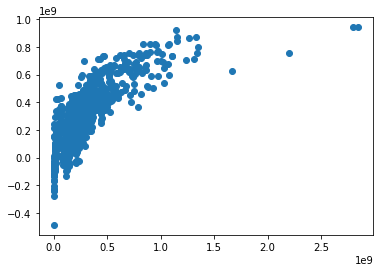

In [60]:
plt.scatter( train['Lifetime Gross'],y_train_pred)

C:\Users\noody\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lifetime Gross'>

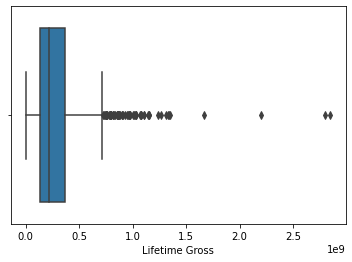

In [61]:
sns.boxplot(train['Lifetime Gross'])

In [71]:

# log experiment 
model_log= lin_reg(train.drop(['Lifetime Gross','Title'], axis=1),
                        np.log(train['Lifetime Gross']),
                        val.drop(['Lifetime Gross', 'Title'], axis=1),
                        np.log(val['Lifetime Gross']))

training score : 0.9297
validation score : 0.9104


In [63]:
model_log.score(test.drop(['Lifetime Gross','Title'], axis=1),
                        np.log(test['Lifetime Gross']),)

0.9074698886714829

In [64]:
#Feature scaling for train
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train[['Rank','Overall Rank','year','duration','month','day','avg_vote']])
x_train_scaled= ss.transform(train[['Rank','Overall Rank','year','duration','month','day','avg_vote']])
x_val_scaled_11= ss.transform(val[['Rank','Overall Rank','year','duration','month','day','avg_vote']])
model= lin_reg(x_train_scaled,train['Lifetime Gross'],x_val_scaled_11,val['Lifetime Gross'])

training score : 0.5188
validation score : 0.5522


In [104]:
#lasso model
lasso_model= Lasso(alpha=0.01)
lasso_model.fit(train.drop(['Title','Lifetime Gross'], axis=1),
                np.log(train['Lifetime Gross']))

Lasso(alpha=100000000)

In [105]:
lasso_model.coef_

array([-0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,
        0.])

In [101]:
#lasso model
from sklearn.linear_model import LassoCV
lasso_modelcv= LassoCV(alphas=[0.00001,0.0001, 0.001, 0.01, 0.1, 1,2] , cv=5)
lasso_modelcv.fit(train.drop(['Title','Lifetime Gross'], axis=1)
                  ,np.log(train['Lifetime Gross']))

LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2], cv=5)

In [102]:
lasso_modelcv.alpha_

0.0001

In [103]:
lasso_modelcv.coef_

array([-0.00221304, -0.00032473,  0.01588728,  0.00435164,  0.00286504,
       -0.0008868 ,  0.02325972, -0.04251623, -0.11433218, -0.12949963,
       -0.12828167, -0.21362919, -0.21483601, -0.29102085, -0.25332757,
        0.02220861, -0.16992826, -0.190464  ,  0.08581944, -0.0376783 ,
       -0.24497104, -0.01400207, -0.04727402, -0.18226785, -0.12189525,
       -0.21330378, -0.04505591])

In [108]:
lasso_modelcv.score(val.drop(['Title','Lifetime Gross'], axis=1)
                        ,np.log(val['Lifetime Gross']))

0.9100208668097469

In [1]:
#validate
las=lasso_model.score(val.drop(['Title'], axis=1),
                      val['Lifetime Gross'],(val['Lifetime Gross']))

print(f'Lasso Regression val R^2: {las}')

las=lasso_model.score(train.drop(['Title'], axis=1),
                      train['Lifetime Gross'],(train['Lifetime Gross']))

print(f'Lasso Regression train R^2: {las}')

NameError: name 'lasso_model' is not defined

In [110]:
lasso_model.score(test.drop(['Title','Lifetime Gross'], axis=1),
                        test['Lifetime Gross'])

-0.9815972458824114

In [68]:
train.corr().loc["Lifetime Gross"].sort_values()

Rank              -0.578680
Overall Rank      -0.402843
genre_family      -0.155790
genre_comedy      -0.154031
genre_drama       -0.115350
genre_crime       -0.111548
genre_sport       -0.068476
genre_horror      -0.061417
genre_music       -0.058639
genre_romance     -0.044447
genre_mystery     -0.037870
genre_biography   -0.029877
genre_war         -0.022299
genre_history     -0.013713
genre_musical     -0.010134
genre_western     -0.009212
genre_animation   -0.001652
genre_thriller     0.001324
day                0.006000
month              0.047644
genre_fantasy      0.076209
genre_sci-fi       0.210217
genre_action       0.248602
avg_vote           0.256621
genre_adventure    0.280766
year               0.329452
duration           0.339731
Lifetime Gross     1.000000
Name: Lifetime Gross, dtype: float64

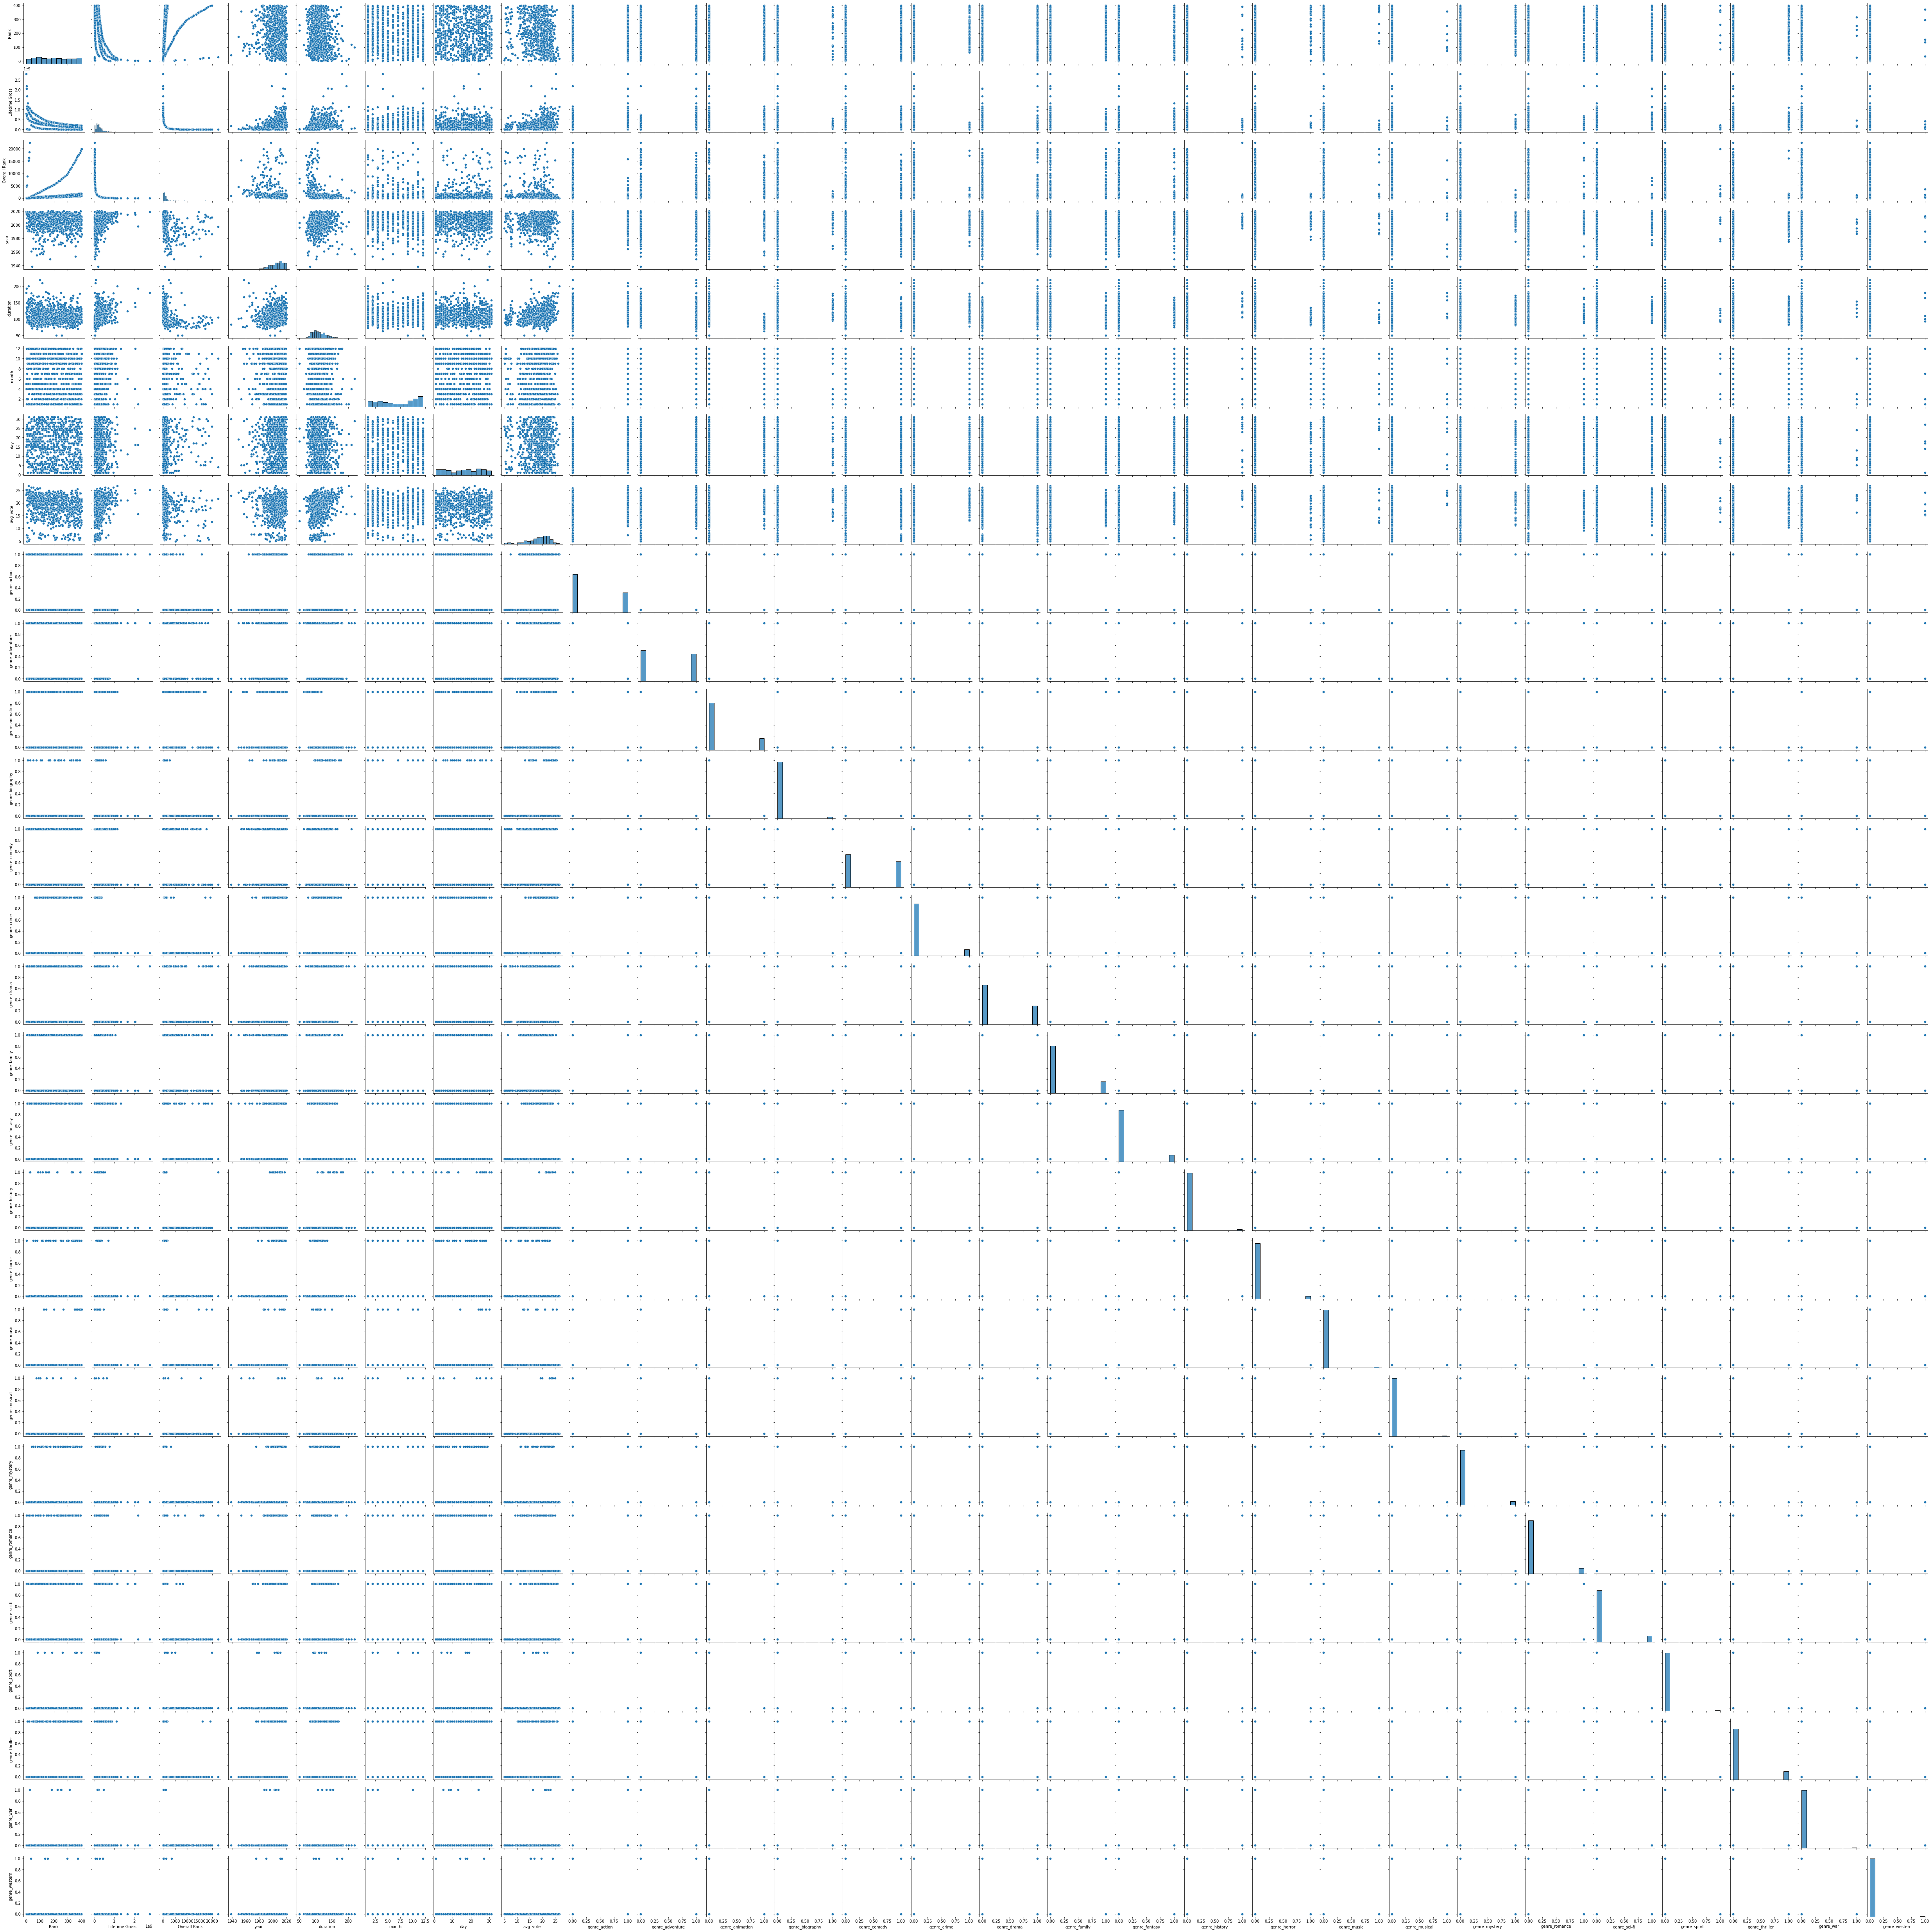

In [69]:
sns.pairplot(train.drop(['Title'],axis=1))